In [111]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


In [78]:
# import in our data
df = pd.read_csv("Spotify2023.csv",  encoding='latin-1')
# filter out any non-numeric values and drop them as a row
df = df[df["streams"].apply(lambda x: x.isnumeric())]
print(df)
# make streams column an int
df["streams"] = df["streams"].astype(int)

                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

# Correlation between artist count & streams
## Do collaborations increase music popularity?


0      2
1      1
2      1
3      1
4      1
      ..
948    1
949    1
950    2
951    3
952    1
Name: artist_count, Length: 952, dtype: int64
0      141381703
1      133716286
2      140003974
3      800840817
4      303236322
         ...    
948     91473363
949    121871870
950     73513683
951    133895612
952     96007391
Name: streams, Length: 952, dtype: int64
   artist_count       streams
0             1  5.682117e+08
1             2  4.624808e+08
2             3  3.813421e+08
3             4  3.061062e+08
4             5  1.448082e+08
5             6  8.746645e+07
6             7  3.390601e+08
7             8  1.732212e+08


<Axes: xlabel='artist_count', ylabel='streams'>

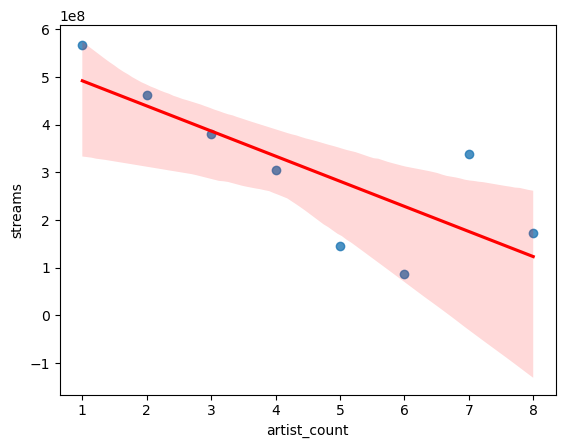

In [83]:
# graph correlation between artist count & streams
print(df["artist_count"])
print(df["streams"])
# average artist_count per stream
modified_df = df.groupby("artist_count")['streams'].mean().reset_index()
print(modified_df)
sns.regplot(x="artist_count", y="streams", data=modified_df, line_kws={"color": "red"})

<Axes: xlabel='danceability_%', ylabel='energy_%'>

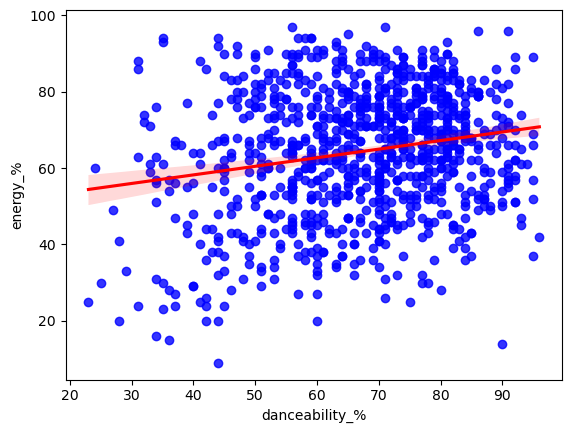

In [80]:
# Correlation between danceability and energy

# plot regression line with line in a different color then the points
sns.regplot(x="danceability_%", y="energy_%", data=df, scatter=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Correlation between month and streams

    released_month       streams
0                1  7.275061e+08
1                2  3.531535e+08
2                3  4.770526e+08
3                4  4.041460e+08
4                5  4.156691e+08
5                6  4.100447e+08
6                7  4.821765e+08
7                8  6.312657e+08
8                9  7.346444e+08
9               10  5.889024e+08
10              11  5.525923e+08
11              12  3.695734e+08


<Axes: xlabel='released_month', ylabel='streams'>

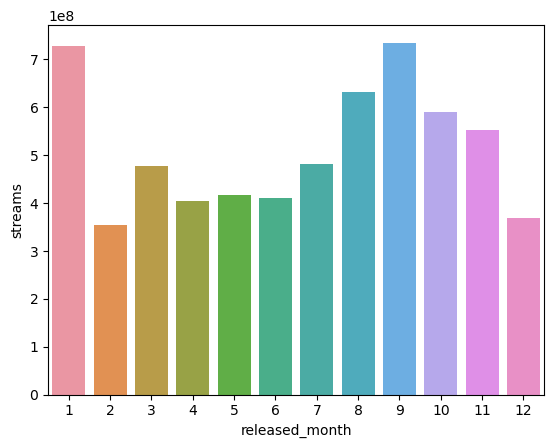

In [91]:
# print df["streams"] type

# create new dataframe that finds the average streams per month
modified_df = df.groupby("released_month")['streams'].mean().reset_index()
print(modified_df)
# plot the average streams per month
sns.barplot(x="released_month", y="streams", data=modified_df)



    released_day       streams
0              1  8.536263e+08
1              2  2.885525e+08
2              3  3.356189e+08
3              4  3.888257e+08
4              5  4.924276e+08
5              6  6.040370e+08
6              7  1.719630e+08
7              8  5.540814e+08
8              9  5.845558e+08
9             10  4.814788e+08
10            11  5.195427e+08
11            12  4.179598e+08
12            13  3.028191e+08
13            14  4.751826e+08
14            15  4.666155e+08
15            16  5.226437e+08
16            17  4.779308e+08
17            18  3.571111e+08
18            19  5.786502e+08
19            20  5.241125e+08
20            21  5.986975e+08
21            22  3.223273e+08
22            23  5.064088e+08
23            24  5.043336e+08
24            25  4.662230e+08
25            26  4.895721e+08
26            27  5.565819e+08
27            28  6.188629e+08
28            29  6.040650e+08
29            30  6.055639e+08
30            31  9.167876e+08


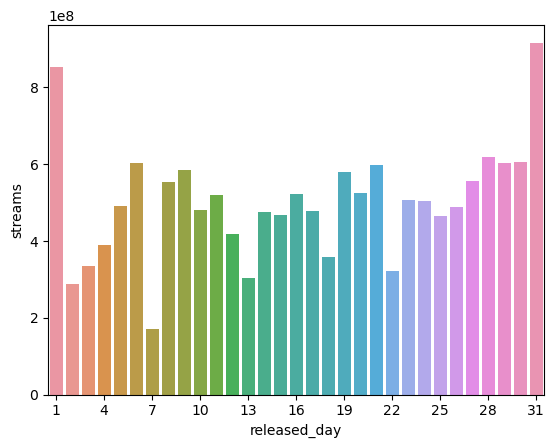

In [97]:
# Correlation between day and streams

# create new dataframe that finds the average streams per month
modified_df = df.groupby("released_day")['streams'].mean().reset_index()
print(modified_df)
# plot the average streams per month
sns.barplot(x="released_day", y="streams", data=modified_df)
# modify x axis to reduce ticks
plt.xticks(np.arange(0, 31, 3))
plt.show()



# Correlation between bpm and song popularity

    bpm_10       streams
0       60  5.621181e+08
1       70  4.987690e+08
2       80  4.907246e+08
3       90  5.612457e+08
4      100  5.309127e+08
5      110  6.052122e+08
6      120  5.141010e+08
7      130  3.857145e+08
8      140  4.331740e+08
9      150  3.888409e+08
10     160  4.931600e+08
11     170  7.304055e+08
12     180  6.616159e+08
13     190  3.316503e+08
14     200  5.451820e+08


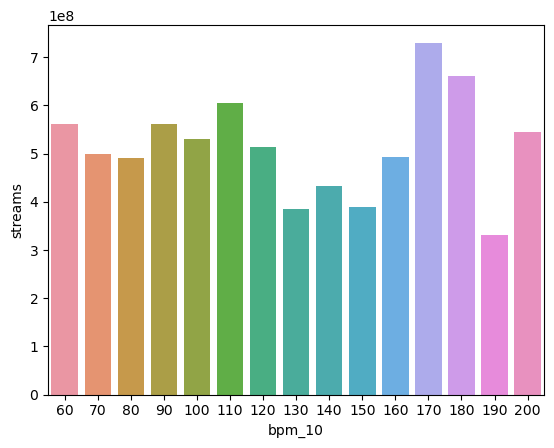

In [98]:
# correlation between bpm and streams

# first puts bpm into ranges of 10
df["bpm_10"] = df["bpm"].apply(lambda x: x - (x % 10))
# create new dataframe that finds the average streams per month
modified_df = df.groupby("bpm_10")['streams'].mean().reset_index()
print(modified_df)
# plot bpm vs streams
sns.barplot(x="bpm_10", y="streams", data=modified_df)
plt.show()

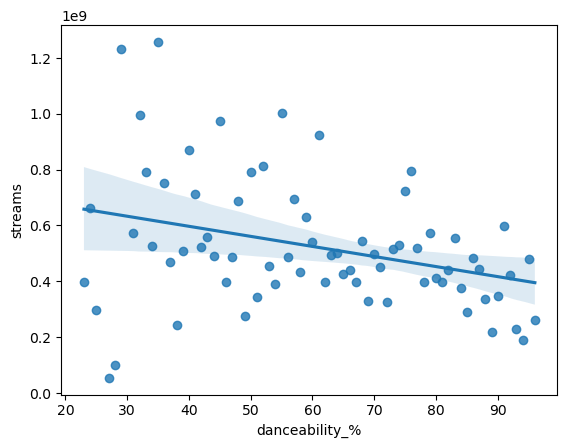

In [102]:
# correlation between song key and streams
modified_df = df.groupby("danceability_%")['streams'].mean().reset_index()
# plot key vs streams
sns.regplot(x="danceability_%", y="streams", data=modified_df)
plt.show()

0      35
1       4
2       7
3      12
4      14
       ..
948    12
949    25
950    20
951    13
952     5
Name: title_length, Length: 952, dtype: int64


<Axes: xlabel='title_length', ylabel='streams'>

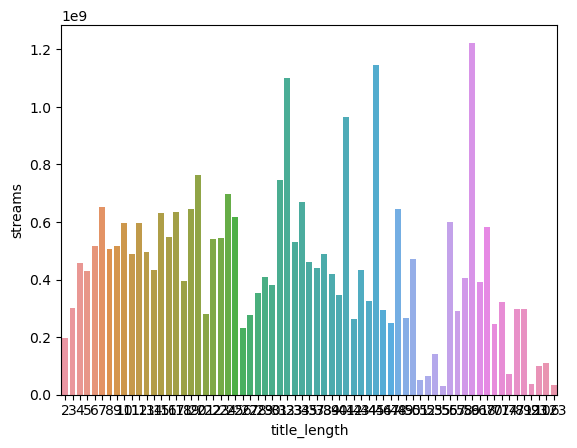

In [107]:
# find word length of song title
df["title_length"] = df["track_name"].apply(lambda x: len(x))
print(df["title_length"])
# group by word length and find average streams
modified_df = df.groupby("title_length")['streams'].mean().reset_index()
# plot word length vs streams
sns.barplot(x="title_length", y="streams", data=modified_df)

In [116]:
# find the most common word used in song titles
from collections import Counter
# create a list of all the words in the song titles
# convert to lower case
df["track_name"] = df["track_name"].apply(lambda x: x.lower())
words = []
for title in df["track_name"]:
    words.extend(title.split())
    # count the number of times each word appears
word_count = Counter(words)
# remove stop words
for word in ENGLISH_STOP_WORDS:
    if word in word_count:
        del word_count[word]
# print the 10 most common words
print(word_count.most_common(50))




[('(feat.', 58), ('-', 56), ('&', 35), ('(with', 33), ('love', 23), ('la', 20), ('christmas', 16), ('remix', 14), ('like', 13), ('music', 11), ('(from', 10), ('el', 10), ('version)', 9), ('bzrp', 9), ('sessions,', 9), ('vol.', 9), ('let', 9), ('remastered', 8), ("don't", 7), ('version', 7), ('(metro', 7), ('boomin', 7), ('know', 7), ('time', 7), ('night', 6), ('del', 6), ('die', 6), ('edit', 6), ('bts)', 6), ('travis', 6), ('lil', 6), ('ao', 6), ('vivo', 6), ('snow!', 6), ('super', 5), ('wanna', 5), ('original', 5), ('dance', 5), ('good', 5), ('baby', 5), ('2', 5), ("(taylor's", 5), ('que', 5), ('(spider-man:', 5), ('young', 5), ('bad', 5), ('u', 5), ('talk', 5), ("i'm", 4), ('right', 4)]
